# Unit 5 - Financial Planning


In [5]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json
%matplotlib inline

In [6]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [7]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [10]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [11]:
# Fetch current BTC price
response_btc = requests.get(btc_url)
response_content_btc = response_btc.content
data_btc = response_btc.json()

print(json.dumps(data_btc, indent = 5))

{
     "data": {
          "1": {
               "id": 1,
               "name": "Bitcoin",
               "symbol": "BTC",
               "website_slug": "bitcoin",
               "rank": 1,
               "circulating_supply": 18719762,
               "total_supply": 18719762,
               "max_supply": 21000000,
               "quotes": {
                    "USD": {
                         "price": 39729.0,
                         "volume_24h": 44971111626,
                         "market_cap": 742678879045,
                         "percentage_change_1h": -0.927127142176282,
                         "percentage_change_24h": 2.42578119261878,
                         "percentage_change_7d": 6.54921141453779,
                         "percent_change_1h": -0.927127142176282,
                         "percent_change_24h": 2.42578119261878,
                         "percent_change_7d": 6.54921141453779
                    }
               },
               "last_updated": 16221311

In [12]:
# Fetch current ETH price
response_eth = requests.get(eth_url)
response_content_eth = response_eth.content
data_eth = response_eth.json()

print(json.dumps(data_eth, indent = 5))

{
     "data": {
          "1027": {
               "id": 1027,
               "name": "Ethereum",
               "symbol": "ETH",
               "website_slug": "ethereum",
               "rank": 2,
               "circulating_supply": 116046924,
               "total_supply": 116046924,
               "max_supply": 0,
               "quotes": {
                    "USD": {
                         "price": 2810.83,
                         "volume_24h": 49412504614,
                         "market_cap": 326020760589,
                         "percentage_change_1h": -1.37544216924746,
                         "percentage_change_24h": 2.03620388062606,
                         "percentage_change_7d": 12.2079328356931,
                         "percent_change_1h": -1.37544216924746,
                         "percent_change_24h": 2.03620388062606,
                         "percent_change_7d": 12.2079328356931
                    }
               },
               "last_updated": 1622131

In [15]:
# Compute current value of my crpto
btc_price = data_btc['data']['1']['quotes']['USD']['price']
btc_value = my_btc * btc_price

eth_price = data_eth['data']['1027']['quotes']['USD']['price']
eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${eth_value:0.2f}")

The current value of your 1.2 BTC is $47674.80
The current value of your 5.3 ETH is $14897.40


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [24]:
# Current amount of shares
my_spy = 50
my_agg = 200

In [25]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')

# Create the Alpaca API object
api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version = 'v2')

In [26]:
# Format current date as ISO format
today = pd.Timestamp('2021-05-27', tz = 'America/New_York').isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
portfolio_df = api.get_barset(tickers, timeframe, start = today, end = today).df

# Preview DataFrame
portfolio_df.head()

AGG                                       SPY  \
                             open    high     low    close   volume    open   
time                                                                          
2021-05-27 00:00:00-04:00  114.61  114.62  114.45  114.485  2296712  420.17   

                                                                 
                             high       low     close    volume  
time                                                             
2021-05-27 00:00:00-04:00  420.72  418.9851  420.2801  20231645

In [29]:
# Pick AGG and SPY close prices
spy_close_price = float(portfolio_df['SPY']['close'])
agg_close_price = float(portfolio_df['AGG']['close'])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.485
Current SPY closing price: $420.2801


In [30]:
## Compute the current value of shares
spy_value = my_spy * spy_close_price
agg_value = my_agg * agg_close_price

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${agg_value:0.2f}")

The current value of your 50 SPY shares is $21014.01
The current value of your 200 AGG shares is $22897.00


### Savings Health Analysis

In [32]:
# Set monthly household income
monthly_income = 12000
total_crypto = btc_value + eth_value
total_shares = agg_value + spy_value

# Create savings DataFrame
savings_data = {'amount':[total_crypto, total_shares]}
df_savings = pd.DataFrame(savings_data, index = ['crypto', 'shares'])

# Display savings DataFrame
display(df_savings)

,amount
crypto,62572.199
shares,43911.005


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

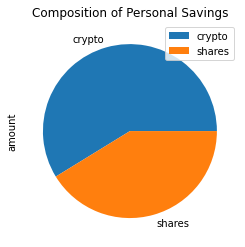

In [33]:
# Plot savings pie chart
df_savings.plot.pie(y = 'amount', title = 'Composition of Personal Savings')

In [34]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = total_crypto + total_shares

# Validate saving health
if emergency_fund < total_savings:
    print(f"Congratulations! You have enough money in your emergency fund.")
elif emergency_fund == total_savings:
    print(f"Congratulations! You have reached your financial goal")
else:
    print(f"You are ${emergency_fund - total_savings} away from reaching your financial goal." )

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [44]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-27', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-27', tz='America/New_York').isoformat()

In [60]:
# Get 5 years' worth of historical data for SPY and AGG
tickers = ['AGG', 'SPY']
timeframe = "1D"
stockdata_df = api.get_barset(
    tickers, 
    timeframe, 
    start = start_date, 
    end = end_date,
    limit = 1000).df

# remove Timestamps
stockdata_df.index = stockdata_df.index.date
# Display sample data
stockdata_df.head()




AGG                                             SPY          \
              open      high       low    close     volume    open    high   
2017-06-07  109.81  109.8700  109.7000  109.730  1570692.0     NaN     NaN   
2017-06-08  109.70  109.7000  109.5101  109.650  1243191.0  243.77  244.33   
2017-06-09  109.51  109.6300  109.4600  109.560  1356020.0  244.09  245.01   
2017-06-12  109.51  109.6958  109.4700  109.555  1184601.0  243.14  243.42   
2017-06-13  109.43  109.6000  109.4300  109.580  1324388.0  243.99  244.61   

                                           
                 low   close       volume  
2017-06-07       NaN     NaN          NaN  
2017-06-08  243.1700  243.76   48051333.0  
2017-06-09  241.9500  243.45  103578275.0  
2017-06-12  242.3800  243.34   57096569.0  
2017-06-13  243.5799  244.52   43470532.0

In [61]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_4060 = MCSimulation(portfolio_data = stockdata_df, weights = [0.4, 0.6], num_simulation = 500, num_trading_days = 252*30)

In [62]:
# Printing the simulation input data
MC_4060.portfolio_data.head()

AGG                                                       \
              open      high       low    close     volume daily_return   
2017-06-07  109.81  109.8700  109.7000  109.730  1570692.0          NaN   
2017-06-08  109.70  109.7000  109.5101  109.650  1243191.0    -0.000729   
2017-06-09  109.51  109.6300  109.4600  109.560  1356020.0    -0.000821   
2017-06-12  109.51  109.6958  109.4700  109.555  1184601.0    -0.000046   
2017-06-13  109.43  109.6000  109.4300  109.580  1324388.0     0.000228   

               SPY                                                      
              open    high       low   close       volume daily_return  
2017-06-07     NaN     NaN       NaN     NaN          NaN          NaN  
2017-06-08  243.77  244.33  243.1700  243.76   48051333.0          NaN  
2017-06-09  244.09  245.01  241.9500  243.45  103578275.0    -0.001272  
2017-06-12  243.14  243.42  242.3800  243.34   57096569.0    -0.000452  
2017-06-13  243.99  244.61  243.5799  244.52   43470532.0     0.004849

In [63]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_4060.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.992680,0.987560,0.994187,0.994817,1.009276,0.994302,0.997781,1.014858,1.002637,0.994108,...,1.003021,1.014670,0.999398,1.001121,1.009198,0.991241,0.993282,1.009785,0.995255,0.991949
2,1.000749,0.997760,1.007722,1.001786,1.002359,0.989752,1.000627,1.008373,0.999806,1.002423,...,0.989967,1.024268,1.000619,1.003523,1.016839,1.000290,0.996565,1.020136,1.007620,0.990499
3,1.016721,1.007826,0.998116,0.994916,1.008174,0.983359,0.986610,1.021228,1.007074,0.983776,...,0.988014,1.019290,0.998978,0.994984,1.012494,1.010175,0.998654,1.010285,1.005379,0.996551
4,1.012580,1.008320,1.012020,0.994919,1.014293,0.990443,0.990304,1.024264,0.998306,0.986280,...,0.996808,0.996958,0.999354,1.004670,1.009491,1.010233,1.006673,1.018997,0.996399,0.988536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,22.598849,37.900782,4.465683,4.892620,10.720754,6.447470,11.922707,19.996969,50.469982,29.490128,...,42.904893,32.958642,34.664980,8.355546,3.708775,25.937049,36.922674,19.570067,12.341120,28.431236
7557,22.625315,37.603752,4.473966,4.919531,10.837701,6.509870,11.900229,20.038771,49.910140,29.221868,...,42.860024,32.605525,34.482077,8.367509,3.711624,25.624956,36.865123,19.460751,12.457158,28.510912
7558,22.670108,38.026938,4.483343,4.865529,10.847031,6.569355,11.810768,20.149448,50.054026,29.347828,...,42.524544,32.656126,34.396046,8.448012,3.697949,25.812120,36.459366,19.556549,12.368876,28.254079
7559,22.657733,37.530960,4.453904,4.817133,10.977121,6.555725,11.879234,20.332010,50.249100,29.592118,...,42.853581,32.365992,34.330061,8.436327,3.705010,25.820147,36.316110,19.348181,12.267586,28.143204


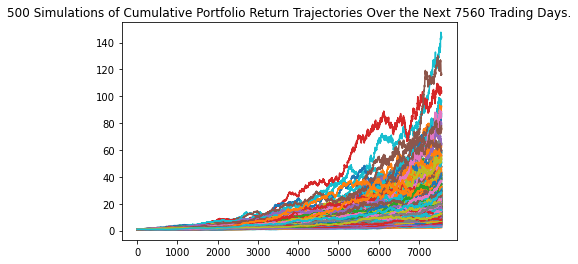

In [64]:
# Plot simulation outcomes
MC_plot = MC_4060.plot_simulation()

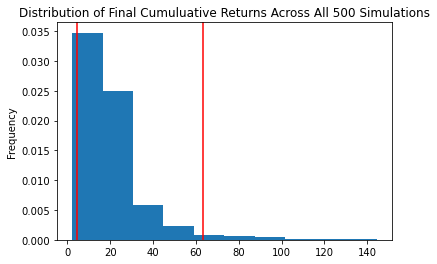

In [65]:
# Plot probability distribution and confidence intervals
MC_dist = MC_4060.plot_distribution()

### Retirement Analysis

In [66]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_4060.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             20.638872
std              16.479660
min               2.215722
25%              10.586326
50%              16.612789
75%              25.109304
max             144.384071
95% CI Lower      4.394321
95% CI Upper     63.518751
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [70]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*20000, 2)
ci_upper = round(tbl[9]*20000, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $87886.42 and $1270375.02


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [69]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment, 2)
ci_upper = round(tbl[9]*initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $131829.62 and $1905562.53


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [86]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_2080_fiveyear = MCSimulation(portfolio_data = stockdata_df, weights = [0.2, 0.8], num_simulation = 500, num_trading_days = 252*5)
MC_2080_fiveyear.portfolio_data.head()

AGG                                                       \
              open      high       low    close     volume daily_return   
2017-06-07  109.81  109.8700  109.7000  109.730  1570692.0          NaN   
2017-06-08  109.70  109.7000  109.5101  109.650  1243191.0    -0.000729   
2017-06-09  109.51  109.6300  109.4600  109.560  1356020.0    -0.000821   
2017-06-12  109.51  109.6958  109.4700  109.555  1184601.0    -0.000046   
2017-06-13  109.43  109.6000  109.4300  109.580  1324388.0     0.000228   

               SPY                                                      
              open    high       low   close       volume daily_return  
2017-06-07     NaN     NaN       NaN     NaN          NaN          NaN  
2017-06-08  243.77  244.33  243.1700  243.76   48051333.0          NaN  
2017-06-09  244.09  245.01  241.9500  243.45  103578275.0    -0.001272  
2017-06-12  243.14  243.42  242.3800  243.34   57096569.0    -0.000452  
2017-06-13  243.99  244.61  243.5799  244.52   43470532.0     0.004849

In [87]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_2080_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.986033,0.989281,0.992588,0.997028,1.009188,1.000094,0.989406,1.001838,0.993229,1.003227,...,0.991957,0.978846,0.998467,0.996908,1.007707,0.991986,0.993959,1.007322,0.987658,1.006729
2,0.983404,0.989386,0.999553,1.008579,1.017501,1.004280,0.976102,1.010028,0.992258,1.002778,...,1.004249,0.984390,0.998093,1.000838,1.006819,1.002239,1.012179,1.010909,0.977530,1.002536
3,0.977139,0.977872,1.007028,1.009103,1.024860,1.002660,0.974447,1.020770,1.004505,0.997606,...,1.001742,0.996015,0.985747,0.995664,1.000817,0.998036,1.011041,1.019694,0.979824,1.019641
4,0.984402,0.988974,1.008082,0.992784,1.024573,1.011352,0.984334,1.016281,1.003696,1.009386,...,0.996259,0.994704,0.970766,0.972988,0.989030,1.006067,1.024234,1.031331,0.996313,1.011889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.881465,2.358813,2.115053,2.303536,1.510571,3.050985,0.953095,2.031210,1.383189,2.926983,...,1.915656,1.157249,2.040952,2.148284,1.478887,1.826284,2.142608,2.828517,5.316137,2.223019
1257,1.898379,2.371250,2.123135,2.292826,1.499369,3.113851,0.951386,2.053058,1.391822,2.947887,...,1.916412,1.176233,2.038814,2.122908,1.475385,1.823889,2.142439,2.833129,5.330227,2.188946
1258,1.896916,2.386266,2.127472,2.276195,1.487043,3.105356,0.956510,2.023353,1.400625,2.965308,...,1.874433,1.178937,2.017368,2.124242,1.483705,1.804091,2.163268,2.868906,5.368428,2.222698
1259,1.918781,2.384591,2.105907,2.253371,1.506701,3.100146,0.971423,1.998575,1.406108,2.929890,...,1.879149,1.172740,2.042387,2.110925,1.455458,1.796000,2.168586,2.863523,5.336426,2.210512


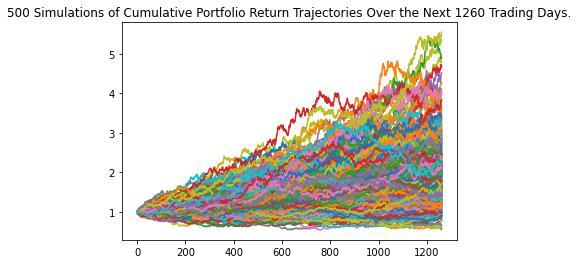

In [88]:
# Plot simulation outcomes
MC_fiveyear_plot = MC_2080_fiveyear.plot_simulation()

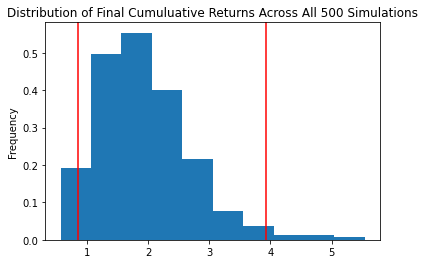

In [89]:
# Plot probability distribution and confidence intervals
MC_dist_fiveyear = MC_2080_fiveyear.plot_distribution()

In [90]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_fiveyear = MC_2080_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(tbl_fiveyear)

count           500.000000
mean              1.946356
std               0.767958
min               0.561781
25%               1.410094
50%               1.865178
75%               2.361911
max               5.546044
95% CI Lower      0.853575
95% CI Upper      3.921943
Name: 1260, dtype: float64


In [91]:
# Set initial investment
initial_investment_fiveyear = 50000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl_fiveyear[8]*60000,2)
ci_upper_five = round(tbl_fiveyear[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_fiveyear} in the portfolio, with a 20%/80% ratio of AGG to SPY"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $50000 in the portfolio, with a 20%/80% ratio of AGG to SPY over the next 5 years will end within in the range of $51214.53 and $235316.6


### Ten Years Retirement Option

In [92]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_2080_tenyear = MCSimulation(portfolio_data = stockdata_df, weights = [0.2, 0.8], num_simulation = 500, num_trading_days = 252*10)
MC_2080_tenyear.portfolio_data.head()

AGG                                                       \
              open      high       low    close     volume daily_return   
2017-06-07  109.81  109.8700  109.7000  109.730  1570692.0          NaN   
2017-06-08  109.70  109.7000  109.5101  109.650  1243191.0    -0.000729   
2017-06-09  109.51  109.6300  109.4600  109.560  1356020.0    -0.000821   
2017-06-12  109.51  109.6958  109.4700  109.555  1184601.0    -0.000046   
2017-06-13  109.43  109.6000  109.4300  109.580  1324388.0     0.000228   

               SPY                                                      
              open    high       low   close       volume daily_return  
2017-06-07     NaN     NaN       NaN     NaN          NaN          NaN  
2017-06-08  243.77  244.33  243.1700  243.76   48051333.0          NaN  
2017-06-09  244.09  245.01  241.9500  243.45  103578275.0    -0.001272  
2017-06-12  243.14  243.42  242.3800  243.34   57096569.0    -0.000452  
2017-06-13  243.99  244.61  243.5799  244.52   43470532.0     0.004849

In [93]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_2080_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.014256,1.011022,1.005487,0.992570,0.997230,1.001157,1.000340,1.004033,1.004997,1.007310,...,0.993593,1.009876,1.007959,1.012065,1.016880,1.007083,0.993828,1.005300,1.027383,0.988333
2,1.010319,1.019287,1.009469,0.991295,1.007907,1.020970,1.002694,1.000356,1.016246,1.013492,...,0.999228,1.000217,0.997514,1.007103,1.009760,0.997143,0.998140,1.006779,1.019968,0.971222
3,1.016615,1.015236,1.019307,0.986749,1.001908,1.017257,1.001124,0.985408,1.025846,1.014246,...,0.979819,1.002566,1.007671,1.010325,1.002579,1.007267,1.013969,0.995984,0.999707,0.983996
4,1.008267,1.032035,1.011267,0.981152,0.992449,1.025609,0.996619,0.968528,1.030253,1.024547,...,0.983590,0.994078,1.026884,1.019533,0.998307,1.004687,1.009857,1.000894,0.989868,0.987247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,4.662414,2.711895,2.500555,4.370260,5.461280,3.602670,6.264814,2.452336,3.300022,1.011960,...,1.857379,3.118637,2.872455,2.509785,6.761316,3.138997,4.837900,1.726172,3.678155,1.869975
2517,4.592018,2.695316,2.517449,4.380491,5.498227,3.579837,6.312272,2.428946,3.290523,1.017470,...,1.872419,3.103587,2.863139,2.468856,6.814807,3.133054,4.823277,1.725245,3.614553,1.848517
2518,4.549130,2.647699,2.511674,4.410192,5.464018,3.585699,6.332388,2.467114,3.344711,1.006697,...,1.876954,3.066057,2.903761,2.513525,6.854541,3.141004,4.787216,1.701223,3.632499,1.860283
2519,4.500084,2.600336,2.508306,4.335047,5.559267,3.597343,6.225868,2.468391,3.319025,1.003864,...,1.877326,3.077564,2.902478,2.528319,6.851750,3.120377,4.802739,1.710221,3.648967,1.810528


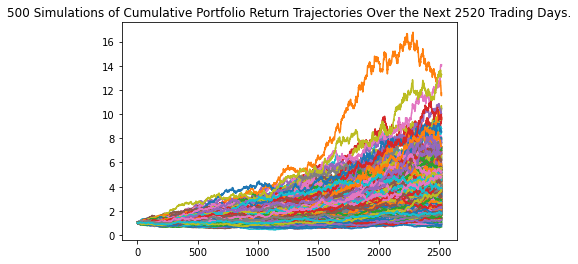

In [95]:
# Plot simulation outcomes
MC_tenyear_plot = MC_2080_tenyear.plot_simulation()

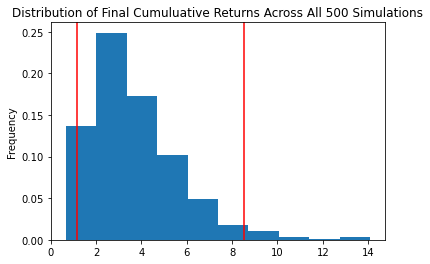

In [96]:
# Plot probability distribution and confidence intervals
MC_dist_tenyear = MC_2080_tenyear.plot_distribution()

In [98]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_tenyear = MC_2080_tenyear.summarize_cumulative_return()

# Print summary statistics
print(tbl_tenyear)

count           500.000000
mean              3.697245
std               1.999025
min               0.668236
25%               2.209616
50%               3.292866
75%               4.682562
max              14.086323
95% CI Lower      1.159927
95% CI Upper      8.540914
Name: 2520, dtype: float64


In [100]:
# Set initial investment
initial_investment_tenyear = 50000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $50,000
ci_lower_ten = round(tbl_tenyear[8]*50000, 2)
ci_upper_ten = round(tbl_tenyear[9]*50000, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_tenyear} in the portfolio with a 20%/80% ratio of AGG to SPY"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $50000 in the portfolio with a 20%/80% ratio of AGG to SPY over the next 10 years will end within in the range of $57996.34 and $427045.7
